# Predicting Wins in MLB 

# Author: Michael Tiernan

# Brief History

Betting on sports has a long history despite the fact that it has only recently become legal to do so outside of Nevada (which legalized it in 1942). New Jersey became just the second state in the US to legalize sports betting following a US Supreme Court ruling in May of 2018. This was a major court decision that opened the floodgates for more states to follow and billions of dollars to be generated doing so. As of today, June 24, 2021, 22 states have legalized sports betting in the US. The rest of the US has either passed or introduced a bill to legalize the industry with the exception of only three states (Idaho, Utah, Wisconsin) who have not. 

For those not familiar with the industry, a sportsbook (ex. DraftKings, William Hill, FanDuel, Barstool) creates betting odds based on their own machine learning models for the user to then wager money on. If the two teams are very similar and there is no clear favorite, the odds for that game would be close to even. When the odds are even, a $100 bet will return a $100 payout (if the team you bet on wins). But what if one team is heavily favored? When the best team has a game against the worst team, the odds for that game have to account for this disparity and the way they do that is adjusting the odds to lets say -200, which means that your $100 bet now only returns a $50 payout. By doing so, one may be persuaded to then bet on the underdog in this scenario because the odds on the underdog will be +150, which means your $100 would return $150 payout. By adjusting the odds, the sportsbook is looking to have an even amount of action on each team because this almost assures them a profit due to the fact that it is expected that the favorite will win, in which case they only have to payout $50 in the 2nd scenario, but at the same time collecting the $100 lost bet from the underdog bettor. This, coupled with the resources and mastery that the sportsbooks have in creating the odds, is what makes betting on sports so difficult in terms of being profitable over the long-term for the average user.

# Business Problem

Given this brief history, it is clear that the average bettor has an uphill battle to long-term profitability. For my analysis, I am looking to answer the two questions below:

    1) What are the best predictors for season total wins?
    2) What are the best predictors for individual game wins?

Like any other game, whether it be casino, board games, or competitive sport, the intelligent player is going to  look for a competitive advantage. Within the sports betting industry, the inexperienced bettor likely makes their wagers based off of gut intuition. The intermediate bettor may incorporate research from articles read or a comparison of some surface-level stats, but the true competitive advantage comes from a deep-dive into the data, using machine learning algorithms to account for as many factors/predictors as possible. 

This is the strategy I will continuously build upon in pursuit of creating a highly competitive algorithm for long-term sports betting profitability.

In [6]:
# importing packages to be used
import pandas as pd
# setting pandas display to avoid scientific notation
pd.options.display.float_format = '{:.3f}'.format
# setting to see all columns in outputs of dataframes
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme(style="whitegrid")
import scipy.stats as stats
import statsmodels.api as sm
import sklearn
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, BaggingRegressor, RandomForestRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, precision_recall_curve
from sklearn.metrics import roc_curve, auc
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import GridSearchCV
from numpy import mean, std
from math import sqrt
import warnings
warnings.filterwarnings('ignore')
import pickle

In [7]:
df_teams = pd.read_pickle('df_teams.pkl')

In [8]:
df_teams.head()

W    R    AB     H   2B  3B   HR      BB       SO      SB  \
yearID franchID                                                               
2000   ANA       82  864  5628  1574  309  34  236 608.000 1024.000  93.000   
       ARI       85  792  5527  1466  282  44  179 535.000  975.000  97.000   
       ATL       95  810  5489  1490  274  26  179 595.000 1010.000 148.000   
       BAL       74  794  5549  1508  310  22  184 558.000  900.000 126.000   
       BOS       85  792  5630  1503  316  32  167 611.000 1019.000  43.000   

                    SF   RA   ER   ERA  CG  SHO  SV    HA  HRA  BBA   SOA  \
yearID franchID                                                             
2000   ANA      43.000  869  805 5.000   5    3  46  1534  228  662   846   
       ARI      58.000  754  698 4.350  16    8  38  1441  190  500  1220   
       ATL      45.000  714  648 4.050  13    9  53  1428  165  484  1093   
       BAL      54.000  913  855 5.370  14    6  33  1547  202  665  1017   
       BOS      48.000  745  683 4.230   7   12  46  1433  173  498  1121   

                   E   DP    FP  BPF  PPF  DivWin_Y  WCWin_Y  LgWin_Y  \
yearID franchID                                                         
2000   ANA       134  182 0.978  102  103         0        0        0   
       ARI       107  138 0.982  105  103         0        0        0   
       ATL       129  138 0.979  101   99         1        0        0   
       BAL       116  151 0.981   95   96         0        0        0   
       BOS       109  120 0.982  104  103         0        0        0   

                 WSWin_Y  run_diff    ba  
yearID franchID                           
2000   ANA             0        -5 0.280  
       ARI             0        38 0.265  
       ATL             0        96 0.271  
       BAL             0      -119 0.272  
       BOS             0        47 0.267

In [9]:
df_teams.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 600 entries, (2000, ANA) to (2019, WSN)
Data columns (total 32 columns):
W           600 non-null int64
R           600 non-null int64
AB          600 non-null int64
H           600 non-null int64
2B          600 non-null int64
3B          600 non-null int64
HR          600 non-null int64
BB          600 non-null float64
SO          600 non-null float64
SB          600 non-null float64
SF          600 non-null float64
RA          600 non-null int64
ER          600 non-null int64
ERA         600 non-null float64
CG          600 non-null int64
SHO         600 non-null int64
SV          600 non-null int64
HA          600 non-null int64
HRA         600 non-null int64
BBA         600 non-null int64
SOA         600 non-null int64
E           600 non-null int64
DP          600 non-null int64
FP          600 non-null float64
BPF         600 non-null int64
PPF         600 non-null int64
DivWin_Y    600 non-null uint8
WCWin_Y     600 non-null uin

In [10]:
#cols = ['yearID','franchID']
#df_teams.drop(cols, axis=1, inplace=True)

In [11]:
# move target column to the end of df
cols = list(df_teams.columns.values)
cols.pop(cols.index('W'))
df_teams = df_teams[cols+['W']]

In [12]:
df_teams.describe()

,R,AB,H,2B,3B,HR,BB,SO,SB,SF,RA,ER,ERA,CG,SHO,SV,HA,HRA,BBA,SOA,E,DP,FP,BPF,PPF,DivWin_Y,WCWin_Y,LgWin_Y,WSWin_Y,run_diff,ba,W
count,600.000,600.000,600.000,600.000,600.000,600.000,600.000,600.000,600.000,600.000,600.000,600.000,600.000,600.000,600.000,600.000,600.000,600.000,600.000,600.000,600.000,600.000,600.000,600.000,600.000,600.000,600.000,600.000,600.000,600.000,600.000,600.000
mean,740.668,5539.850,1437.898,287.165,29.662,173.465,522.043,1164.465,92.008,43.687,740.668,681.950,4.248,4.633,9.380,40.813,1437.898,173.465,522.043,1164.465,100.380,147.558,0.983,100.148,100.145,0.200,0.093,0.067,0.033,0.000,0.259,80.970
std,83.212,77.611,82.658,27.725,8.922,36.866,70.177,162.151,30.065,8.595,88.934,82.619,0.535,3.335,3.906,7.280,91.862,29.337,65.086,160.037,16.312,18.100,0.003,5.297,5.213,0.400,0.291,0.250,0.180,111.107,0.012,11.786
min,513.000,5294.000,1199.000,201.000,5.000,91.000,363.000,805.000,19.000,24.000,525.000,478.000,2.940,0.000,1.000,23.000,1125.000,96.000,348.000,764.000,54.000,95.000,0.976,88.000,88.000,0.000,0.000,0.000,0.000,-337.000,0.226,43.000
25%,684.000,5486.000,1376.750,269.000,23.000,148.000,471.000,1043.000,69.000,37.750,676.750,621.750,3.860,2.000,7.000,36.000,1373.000,153.000,477.000,1046.750,88.750,135.000,0.982,97.000,97.000,0.000,0.000,0.000,0.000,-87.000,0.250,72.000
50%,735.000,5538.000,1435.000,286.000,29.000,170.000,521.000,1147.500,89.000,43.000,733.000,677.000,4.205,4.000,9.000,41.000,1439.000,171.000,520.500,1153.000,100.000,147.000,0.983,100.000,100.000,0.000,0.000,0.000,0.000,2.000,0.259,81.000
75%,795.250,5590.500,1495.000,304.000,35.000,199.000,566.250,1276.250,112.000,49.000,804.000,737.500,4.603,7.000,12.000,46.000,1502.000,191.000,566.000,1261.250,110.000,160.000,0.985,103.000,103.000,0.000,0.000,0.000,0.000,81.250,0.268,90.000
max,978.000,5770.000,1667.000,376.000,61.000,307.000,775.000,1595.000,200.000,75.000,981.000,913.000,5.710,18.000,23.000,66.000,1683.000,305.000,728.000,1687.000,145.000,204.000,0.991,125.000,125.000,1.000,1.000,1.000,1.000,300.000,0.294,116.000


One key takeaway from the above is that the standard deviation in number of season total wins for any given team is ~11.5 games. In baseball, there are 162 games in a season, so the 11.5 game std tells me that there is a high level of parity. There are a lot of average teams and it is likely that good teams sometimes lose to bad teams.


# Train_Test_Split

In [13]:
# create target and features/predictors
target = ['W']
features = ['R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO',
       'SB', 'SF', 'RA', 'ER', 'ERA', 'SHO', 'SV', 'HA', 'HRA', 'BBA',
       'SOA', 'E', 'DP', 'FP', 'BPF', 'PPF','run_diff', 'ba']
# create your X and y for train/test sets
X = df_teams[features]
y = df_teams[target]

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=1)

# Linear Regression Assumptions

1) Linearity:

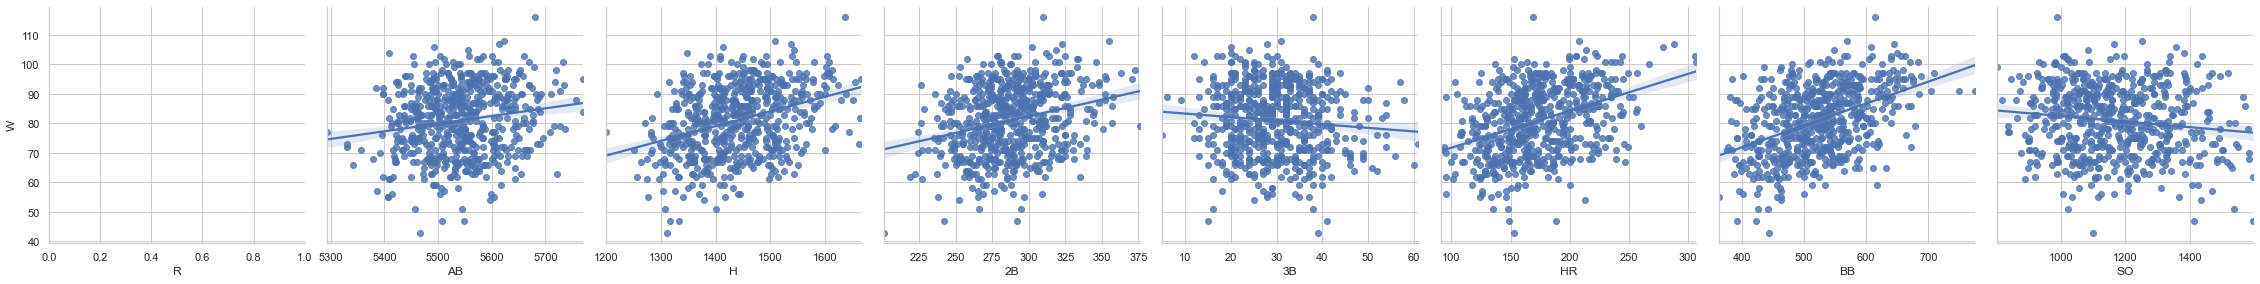

In [14]:
sns.pairplot(df_teams, x_vars=['R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO'], y_vars='W', kind='reg', size=4);

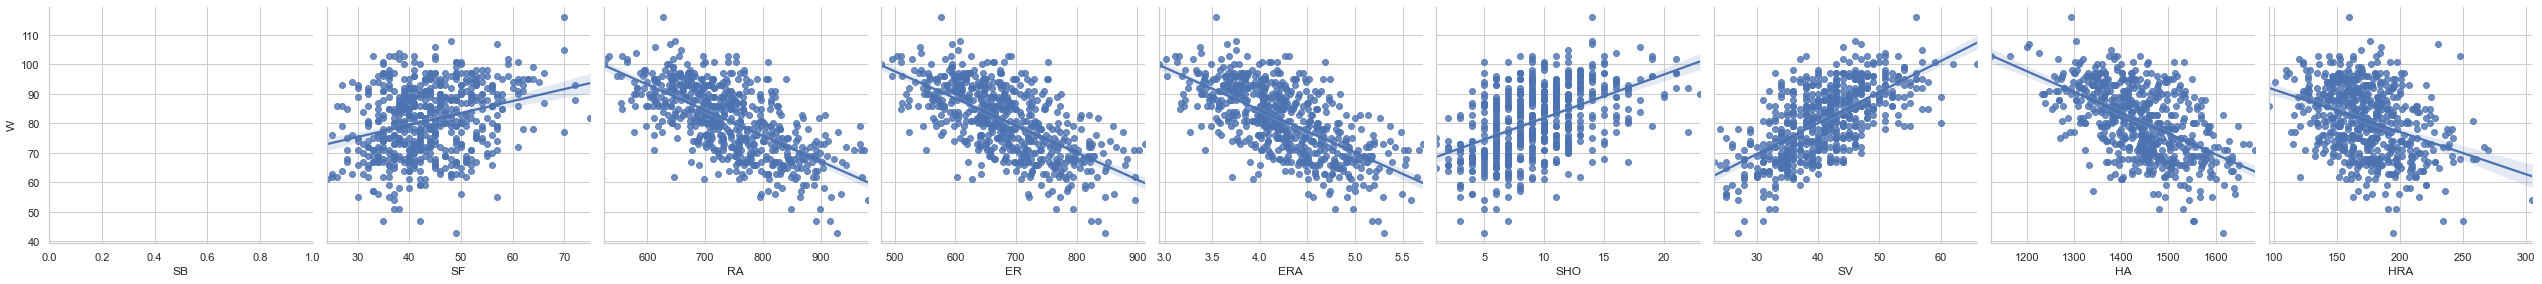

In [15]:
sns.pairplot(df_teams, x_vars=['SB', 'SF', 'RA', 'ER', 'ERA', 'SHO', 'SV', 'HA', 'HRA'], y_vars='W', kind='reg', size=4);

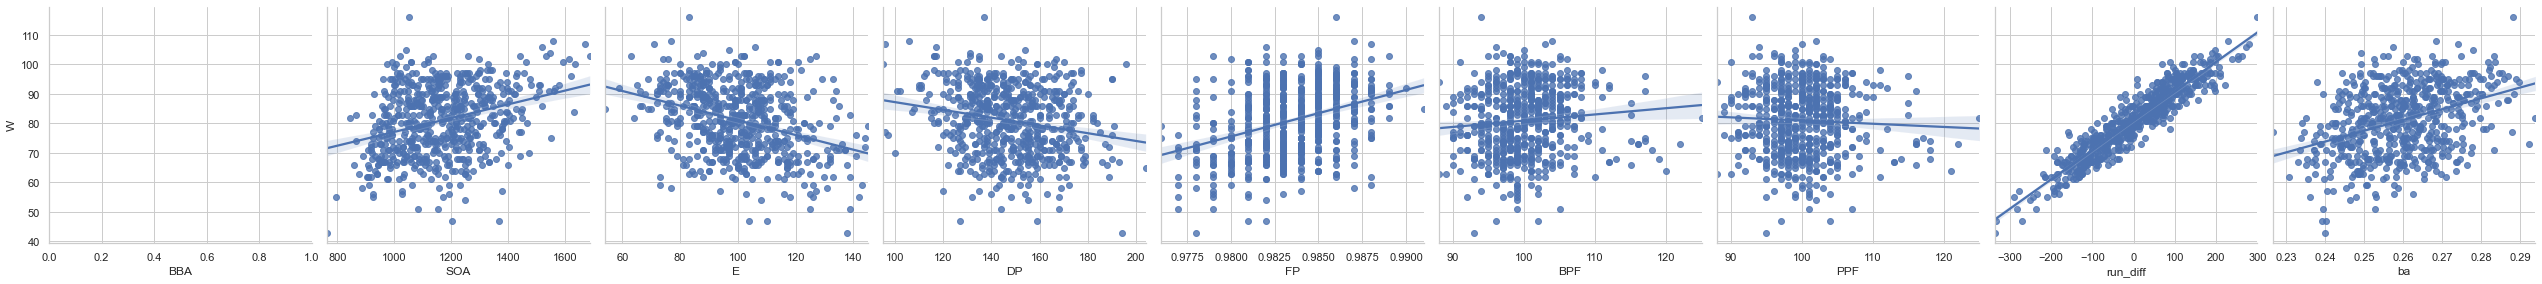

In [16]:
sns.pairplot(df_teams, x_vars=['BBA','SOA', 'E', 'DP', 'FP', 'BPF', 'PPF','run_diff', 'ba'], y_vars='W', kind='reg', size=4);

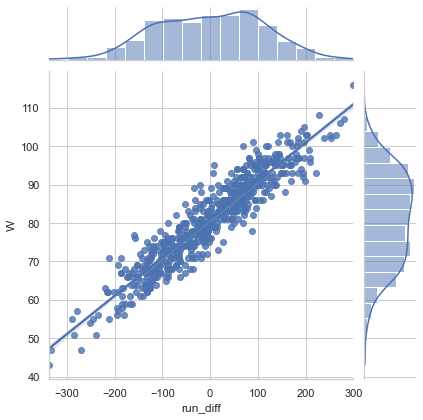

In [17]:
sns.jointplot("run_diff", "W", data=df_teams, kind="reg");

Run differential, which is defined as runs scored - runs against, is very highly correlated with season total wins, while strikeouts, at-bats, triples, and the two ballpark factors are not. Complete games is also not linearly correlated, which is a little surprising because if a pitcher pitches an entire game, that team will very likely win the game, but over the course of a full season it shows that a dominant pitcher can be on a bad team, therefore it is not highly correlated over the course of season total wins.

In [18]:
# drop complete games, not linear
# could analyze this further... test if pitchers with the most CG are usually on bad teams??
cols = ['CG','SO','AB','3B','BPF','PPF']
df_teams.drop(cols, axis=1, inplace=True)

2) Normality

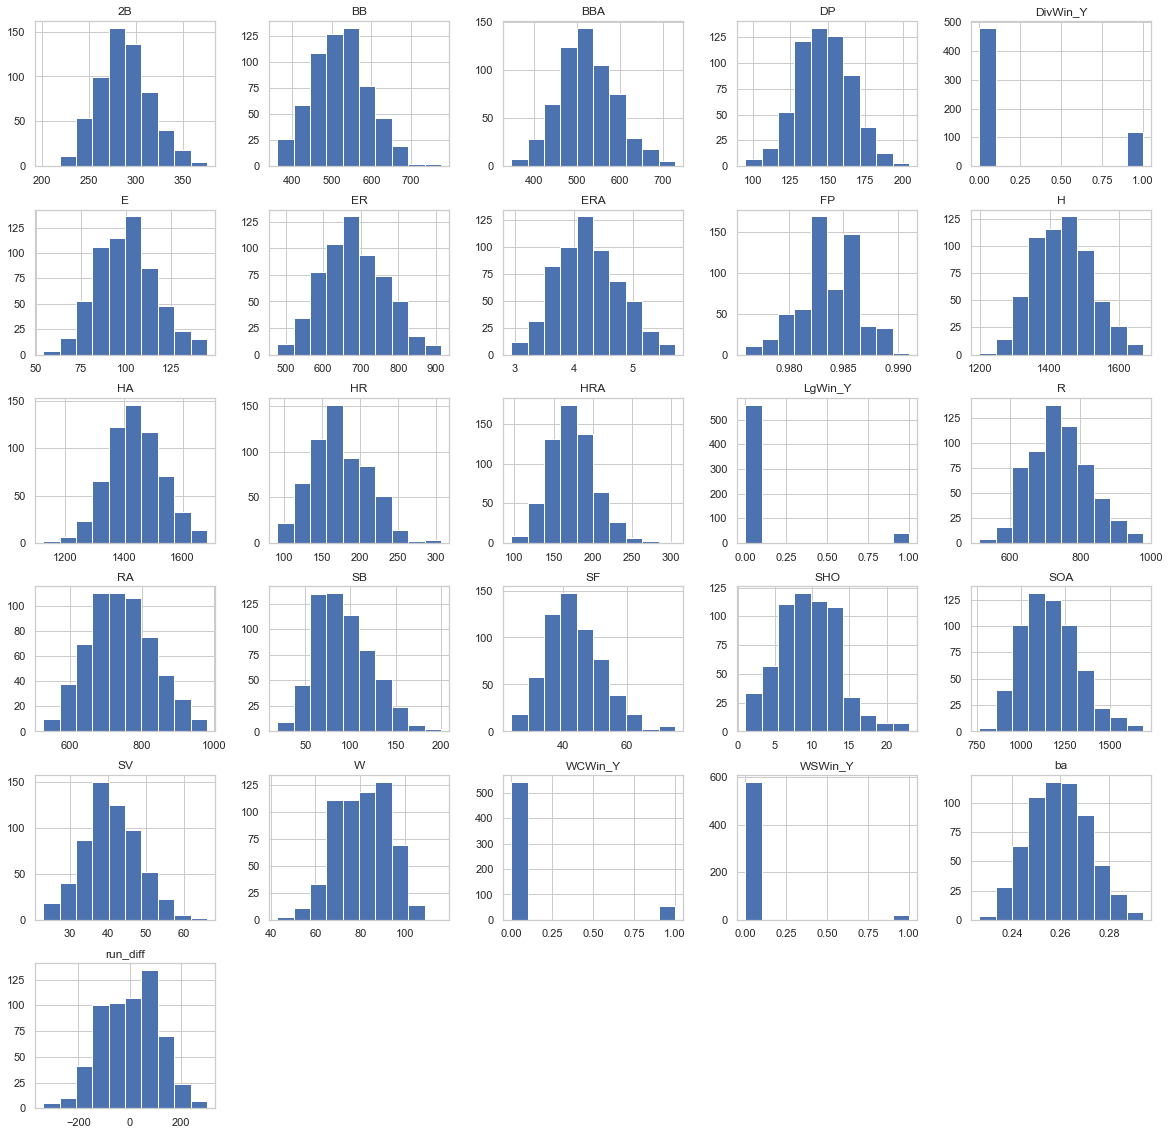

In [19]:
# check distributions 
# normalize all continuous features before modeling
df_teams.hist(figsize=(20,20));

1) check feature correlation

In [20]:
df_teams.corr()

,R,H,2B,HR,BB,SB,SF,RA,ER,ERA,SHO,SV,HA,HRA,BBA,SOA,E,DP,FP,DivWin_Y,WCWin_Y,LgWin_Y,WSWin_Y,run_diff,ba,W
R,1.000,0.757,0.604,0.670,0.603,0.003,0.451,0.168,0.177,0.163,-0.105,0.081,0.129,0.211,0.051,-0.065,-0.041,0.066,0.041,0.334,0.170,0.196,0.157,0.614,0.752,0.553
H,0.757,1.000,0.643,0.219,0.227,0.063,0.492,0.220,0.232,0.219,-0.136,0.012,0.292,0.044,0.099,-0.283,-0.023,0.183,0.037,0.230,0.049,0.167,0.147,0.391,0.984,0.349
2B,0.604,0.643,1.000,0.203,0.314,-0.090,0.366,0.161,0.158,0.146,-0.106,-0.062,0.194,0.002,0.076,-0.168,0.016,0.072,0.001,0.129,0.081,0.161,0.146,0.323,0.621,0.265
HR,0.670,0.219,0.203,1.000,0.409,-0.184,0.017,0.117,0.126,0.113,-0.111,0.131,-0.037,0.389,0.007,0.257,-0.059,-0.071,0.042,0.219,0.145,0.110,0.059,0.408,0.196,0.392
BB,0.603,0.227,0.314,0.409,1.000,-0.016,0.289,-0.043,-0.049,-0.063,0.041,0.099,-0.070,0.000,0.008,0.027,-0.032,-0.081,0.041,0.242,0.206,0.115,0.071,0.486,0.246,0.442
SB,0.003,0.063,-0.090,-0.184,-0.016,1.000,0.177,-0.041,-0.042,-0.042,0.013,0.044,-0.014,-0.036,0.015,-0.100,0.033,-0.040,-0.032,0.054,-0.035,0.057,0.038,0.035,0.089,0.037
SF,0.451,0.492,0.366,0.017,0.289,0.177,1.000,0.010,0.014,0.007,0.007,0.065,0.064,-0.067,-0.030,-0.194,-0.022,0.058,0.026,0.167,0.088,0.098,0.076,0.330,0.521,0.296
RA,0.168,0.220,0.161,0.117,-0.043,-0.041,0.010,1.000,0.990,0.989,-0.678,-0.552,0.845,0.649,0.590,-0.463,0.407,0.307,-0.422,-0.375,-0.220,-0.213,-0.132,-0.675,0.189,-0.656
ER,0.177,0.232,0.158,0.126,-0.049,-0.042,0.014,0.990,1.000,0.998,-0.672,-0.543,0.838,0.669,0.589,-0.448,0.315,0.296,-0.333,-0.368,-0.217,-0.211,-0.125,-0.660,0.199,-0.644
ERA,0.163,0.219,0.146,0.113,-0.063,-0.042,0.007,0.989,0.998,1.000,-0.670,-0.550,0.834,0.664,0.588,-0.457,0.323,0.297,-0.343,-0.372,-0.221,-0.211,-0.125,-0.669,0.194,-0.655


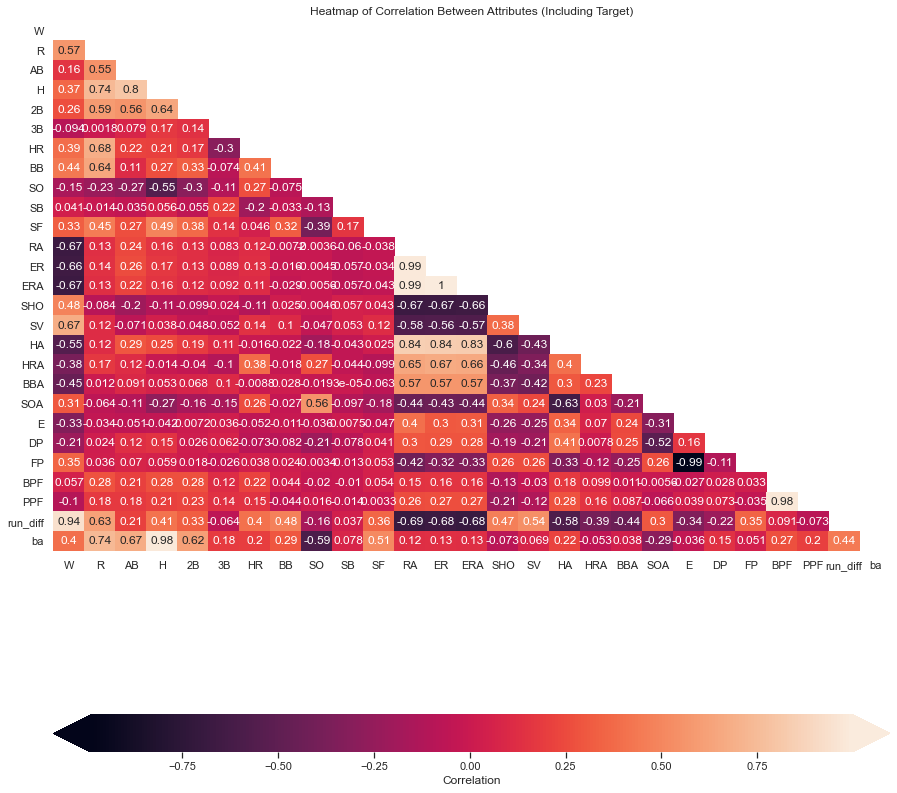

In [21]:
# Create a df with the target as the first column,
# then compute the correlation matrix
heatmap_data = pd.concat([y_train, X_train], axis=1)
corr = heatmap_data.corr()

# Set up figure and axes
fig, ax = plt.subplots(figsize=(15, 15))

# Plot a heatmap of the correlation matrix, with both
# numbers and colors indicating the correlations
sns.heatmap(
    # Specifies the data to be plotted
    data=corr,
    # The mask means we only show half the values,
    # instead of showing duplicates. It's optional.
    mask=np.triu(np.ones_like(corr, dtype=bool)),
    # Specifies that we should use the existing axes
    ax=ax,
    # Specifies that we want labels, not just colors
    annot=True,
    # Customizes colorbar appearance
    cbar_kws={"label": "Correlation", "orientation": "horizontal", "pad": .2, "extend": "both", "cmap":'Blues'}
)

# Customize the plot appearance
ax.set_title("Heatmap of Correlation Between Attributes (Including Target)");

As we saw above, the heatmap now confirms that run differential is the highest predictor of season total wins. We also have features that are highly correlated with each other, which can be problematic in some of our modeling. This phenomenon is known as multicolinearity. Let's dig deeper.

In [22]:
# to better see highest multicollinearity issues lets create a function
# find the columns with the most correlations to the dependant variable
features = []
correlations = []
for idx, correlation in corr['W'].T.iteritems():
    if correlation >= .30 and idx != 'W':
        features.append(idx)
        correlations.append(correlation)
corr_wins_df = pd.DataFrame({'Correlations':correlations, 'Features': features}).sort_values(by=['Correlations'], ascending=False)

In [23]:
# usually any variables that correlate more than 80% have multicollinearity
multicollinear_features = []
multicollinear_corr = []
def check_multicollinearity(feature):
    for idx, correlation in corr[feature].T.iteritems():
        if correlation >= .80 and idx != feature:
            multicollinear_features.append([feature, idx])
            multicollinear_corr.append(correlation)
            
for feature in corr:
    check_multicollinearity(feature)
MC_df = pd.DataFrame({'Correlations':multicollinear_corr, 'Features': multicollinear_features})
print('Multicollinear Features')
#display(MC_df)

Multicollinear Features


In [24]:
MC_df.sort_values('Correlations', ascending=False)

,Correlations,Features
9,0.998,"[ERA, ER]"
6,0.998,"[ER, ERA]"
2,0.990,"[RA, ER]"
5,0.990,"[ER, RA]"
8,0.989,"[ERA, RA]"
3,0.989,"[RA, ERA]"
1,0.983,"[H, ba]"
17,0.983,"[ba, H]"
14,0.977,"[BPF, PPF]"
15,0.977,"[PPF, BPF]"


Linear regression assumes that the predictors are independent of eachother, so before running our baseline model we will be sure to account for this and remove some of the features like Earned runs against, runs against, and hits because their predictive power is already explained by one of the other predictors. 

# Baseline Model - Linear Regression

For my baseline model, I chose linear regression due to the fact that my data is continuous and very linearly correlated. 

In [25]:
def errors(x_values, y_values, m, b):
    y_line = (b + m*x_values)
    return (y_values - y_line)

def squared_errors(x_values, y_values, m, b):
    return np.round(errors(x_values, y_values, m, b)**2, 2)

def residual_sum_squares(x_values, y_values, m, b):
    return round(sum(squared_errors(x_values, y_values, m, b)), 2)

def root_mean_squared_error(x_values, y_values, m, b):
    return round(math.sqrt(sum(squared_errors(x_values, y_values, m, b)))/len(x_values), 2)

In [26]:
target = ['W']
features = ['R', '2B', 'HR', 'BB',
       'SB', 'SF', 'RA', 'SHO', 'SV', 'HRA', 'BBA',
       'SOA', 'E', 'DP', 'FP', 'run_diff', 'ba']
# create your X and y for train/test sets
X = df_teams[features]
y = df_teams[target]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

# scale data using sklearn to normalize all features before running model
ss_scale = preprocessing.StandardScaler().fit(X_train)
X_train_std = ss_scale.transform(X_train)
X_test_std = ss_scale.transform(X_test)

linreg = LinearRegression().fit(X_train, y_train)
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

print('R^2: ', r2_score(y_test, y_hat_test))

R^2:  0.9090642641305404


In [27]:
# RMSE
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_hat_train))
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_hat_test))
print('Train Mean Squarred Error:', train_rmse)
print('Test Mean Squarred Error:', test_rmse)

Train Mean Squarred Error: 3.0569402067313383
Test Mean Squarred Error: 3.325779661664355


In [28]:
# MSE
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

Train Mean Squarred Error: 9.344883427530636
Test Mean Squarred Error: 11.060810357940273


In [29]:
print('Training R-Squared:', linreg.score(X_train, y_train))

Training R-Squared: 0.9346291630574399


In [30]:
print('Test R-Squared:', linreg.score(X_test, y_test))

Test R-Squared: 0.9090642641305404


In [31]:
# run cross validation on difference shuffled subsets of train/test data to validate model above
cv_5_results  = np.mean(cross_val_score(linreg, X, y, cv=5))
cv_10_results = np.mean(cross_val_score(linreg, X, y, cv=10))
cv_20_results = np.mean(cross_val_score(linreg, X, y, cv=20))

In [32]:
print(cv_5_results)
print(cv_10_results)
print(cv_20_results)

0.9237242741306207
0.9228170397342431
0.9220326124140026


R-Squared explains the proportion of variance between the predicted and observed values. It is a value between 1 and 0, where the higher the value, the less variance there is between the predicted and observed. With an R2 of 91%, my baseline model seems to be reliant, but the difference in RMSE and MSE between train and test sets is too big, so we have work to do! 

# Remove Outliers

In [33]:
# calculate summary statistics
data_mean, data_std = mean(df_teams.run_diff), std(df_teams.run_diff)
# identify outliers
cut_off = data_std * 2
lower, upper = data_mean - cut_off, data_mean + cut_off

In [34]:
# identify outliers
outliers = [x for x in df_teams.run_diff if x < lower or x > upper]

In [35]:
sorted(outliers)

[-337,
 -333,
 -289,
 -284,
 -279,
 -270,
 -252,
 -245,
 -238,
 -234,
 229,
 239,
 252,
 254,
 263,
 273,
 280,
 300]

In [36]:
df_teams = df_teams[(df_teams['run_diff']>-234) & (df_teams['run_diff']<229)]

In [37]:
df_teams.describe()

,R,H,2B,HR,BB,SB,SF,RA,ER,ERA,SHO,SV,HA,HRA,BBA,SOA,E,DP,FP,DivWin_Y,WCWin_Y,LgWin_Y,WSWin_Y,run_diff,ba,W
count,582.000,582.000,582.000,582.000,582.000,582.000,582.000,582.000,582.000,582.000,582.000,582.000,582.000,582.000,582.000,582.000,582.000,582.000,582.000,582.000,582.000,582.000,582.000,582.000,582.000,582.000
mean,740.893,1438.778,287.107,173.239,522.397,92.266,43.629,739.741,681.265,4.243,9.385,40.959,1438.404,172.856,522.174,1162.426,100.141,147.737,0.983,0.194,0.095,0.064,0.031,1.153,0.260,81.132
std,81.458,82.359,27.439,36.436,69.183,30.042,8.548,85.919,80.180,0.519,3.862,7.177,88.225,28.763,64.658,153.820,15.940,17.786,0.003,0.396,0.293,0.244,0.173,102.211,0.012,10.918
min,513.000,1199.000,219.000,91.000,375.000,19.000,24.000,525.000,478.000,2.940,1.000,23.000,1226.000,96.000,348.000,846.000,54.000,95.000,0.976,0.000,0.000,0.000,0.000,-220.000,0.226,55.000
25%,685.000,1378.000,269.000,148.250,472.250,69.000,38.000,678.250,623.250,3.870,7.000,36.000,1374.500,153.000,477.000,1047.000,89.000,135.000,0.982,0.000,0.000,0.000,0.000,-83.500,0.251,72.000
50%,735.500,1436.000,285.500,170.000,521.000,89.000,43.000,733.000,676.500,4.200,9.000,41.000,1439.000,171.000,520.500,1152.500,100.000,147.000,0.984,0.000,0.000,0.000,0.000,2.500,0.260,81.500
75%,793.000,1495.750,304.000,198.750,565.000,113.000,49.000,799.500,734.500,4.598,12.000,46.000,1498.000,190.000,565.750,1259.750,110.000,159.750,0.985,0.000,0.000,0.000,0.000,80.000,0.268,90.000
max,978.000,1667.000,376.000,307.000,775.000,200.000,75.000,974.000,913.000,5.710,23.000,66.000,1683.000,270.000,728.000,1634.000,145.000,204.000,0.991,1.000,1.000,1.000,1.000,221.000,0.294,105.000


# Normalize Features

In [38]:
continuous = ['R', 'H', '2B', 'HR', 'BB', 'SB', 'SF', 'RA', 'ER',
       'ERA', 'SHO', 'SV', 'HA', 'HRA', 'BBA', 'SOA', 'E', 'DP', 'FP',
       'ba', 'run_diff', 'W']

In [39]:
df_teams_continuous = df_teams[continuous]

In [40]:
def normalize(feature):
    return (feature - feature.mean()) / feature.std()
    
df_teams_norm = df_teams_continuous.apply(normalize)

In [41]:
df_teams_norm.describe()

,R,H,2B,HR,BB,SB,SF,RA,ER,ERA,SHO,SV,HA,HRA,BBA,SOA,E,DP,FP,ba,run_diff,W
count,582.000,582.000,582.000,582.000,582.000,582.000,582.000,582.000,582.000,582.000,582.000,582.000,582.000,582.000,582.000,582.000,582.000,582.000,582.000,582.000,582.000,582.000
mean,-0.000,0.000,-0.000,0.000,0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,0.000,0.000,-0.000,-0.000,-0.000,0.000
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
min,-2.798,-2.911,-2.482,-2.257,-2.131,-2.439,-2.296,-2.499,-2.535,-2.512,-2.171,-2.502,-2.408,-2.672,-2.694,-2.057,-2.895,-2.965,-2.888,-2.735,-2.164,-2.393
25%,-0.686,-0.738,-0.660,-0.686,-0.725,-0.774,-0.658,-0.716,-0.724,-0.719,-0.617,-0.691,-0.724,-0.690,-0.699,-0.750,-0.699,-0.716,-0.565,-0.750,-0.828,-0.836
50%,-0.066,-0.034,-0.059,-0.089,-0.020,-0.109,-0.074,-0.078,-0.059,-0.083,-0.100,0.006,0.007,-0.065,-0.026,-0.065,-0.009,-0.041,0.209,-0.002,0.013,0.034
75%,0.640,0.692,0.616,0.700,0.616,0.690,0.628,0.696,0.664,0.683,0.677,0.702,0.676,0.596,0.674,0.633,0.619,0.675,0.596,0.690,0.771,0.812
max,2.911,2.771,3.240,3.671,3.651,3.586,3.670,2.727,2.890,2.827,3.525,3.489,2.772,3.377,3.183,3.066,2.814,3.163,2.919,2.844,2.151,2.186


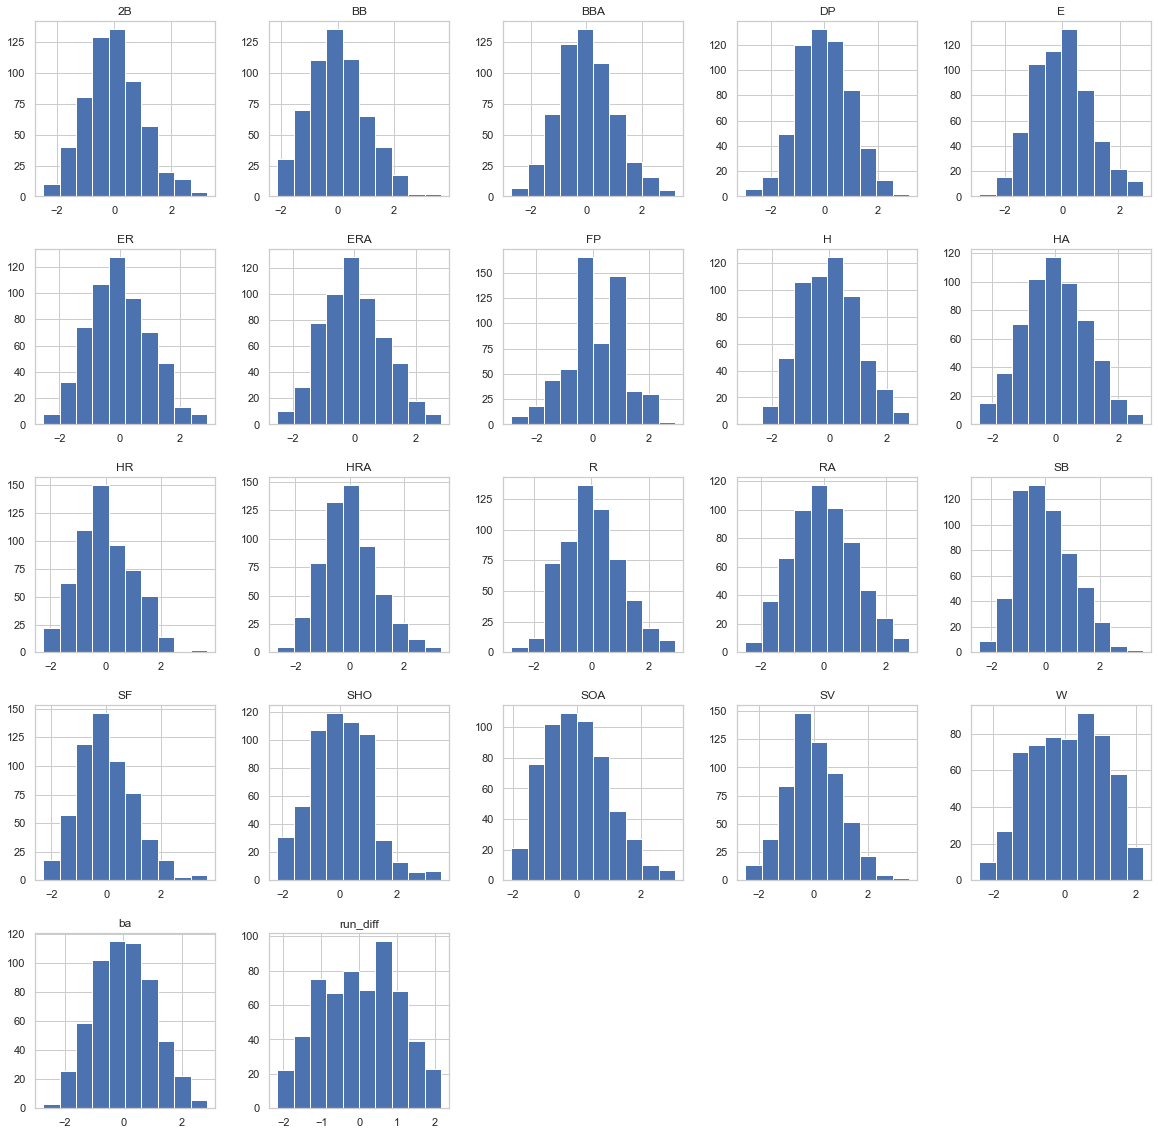

In [42]:
df_teams_norm.hist(figsize=(20,20));

In [43]:
df_teams_norm.isna().sum()

R           0
H           0
2B          0
HR          0
BB          0
SB          0
SF          0
RA          0
ER          0
ERA         0
SHO         0
SV          0
HA          0
HRA         0
BBA         0
SOA         0
E           0
DP          0
FP          0
ba          0
run_diff    0
W           0
dtype: int64

# Model 2: Linear Regression
    - outliers removed and data normalized

In [44]:
target = ['W']
features = ['R', '2B', 'HR', 'BB',
       'SB', 'SF', 'RA', 'SHO', 'SV', 'HRA', 'BBA',
       'SOA', 'E', 'DP', 'FP', 'run_diff', 'ba']

# create your X and y for train/test sets
X = df_teams_norm[features]
y = df_teams_norm[target]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

linreg2 = LinearRegression().fit(X_train, y_train)
y_hat_train = linreg2.predict(X_train)
y_hat_test = linreg2.predict(X_test)

print('R^2: ', r2_score(y_test, y_hat_test))

R^2:  0.9204613699083238


In [45]:
# RMSE
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_hat_train))
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_hat_test))
print('Train Mean Squarred Error:', train_rmse)
print('Test Mean Squarred Error:', test_rmse)

Train Mean Squarred Error: 0.2823525098330941
Test Mean Squarred Error: 0.29971776833970326


In [46]:
# MSE
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

Train Mean Squarred Error: 0.0797229398090475
Test Mean Squarred Error: 0.08983074065853203


In [47]:
linreg2.score(X_train, y_train)

0.9172083112328999

In [48]:
linreg2.score(X_test, y_test)

0.9204613699083238

In [49]:
# run cross validation on difference shuffled subsets of train/test data to validate model above

cv_5_results  = np.mean(cross_val_score(linreg2, X, y, cv=5))
cv_10_results = np.mean(cross_val_score(linreg2, X, y, cv=10))
cv_20_results = np.mean(cross_val_score(linreg2, X, y, cv=20))

In [50]:
print(cv_5_results)
print(cv_10_results)
print(cv_20_results)

0.9111773394353344
0.9132824326491644
0.912591817508468


In [51]:
residual = (y_test - y_hat_test)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A44E2AA8D0>]],
      dtype=object)

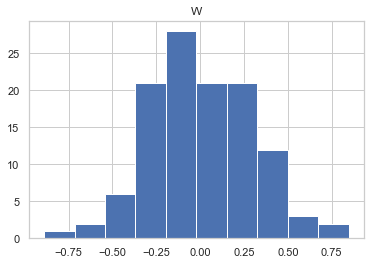

In [52]:
residual.hist()

While my R2 only increased by one, to 92%, my model is much more useful due to the RMSE and MSE in the train/test sets more closely related.

# Decision Tree

In [53]:
target = df_teams_norm['W']
features = df_teams_norm.drop('W', axis=1, inplace=True)

In [54]:
X_train, X_test, y_train, y_test = train_test_split(df_teams_norm, target, test_size=0.2, random_state=42)

In [55]:
# Instantiate and fit a DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(max_depth=5) 
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5)

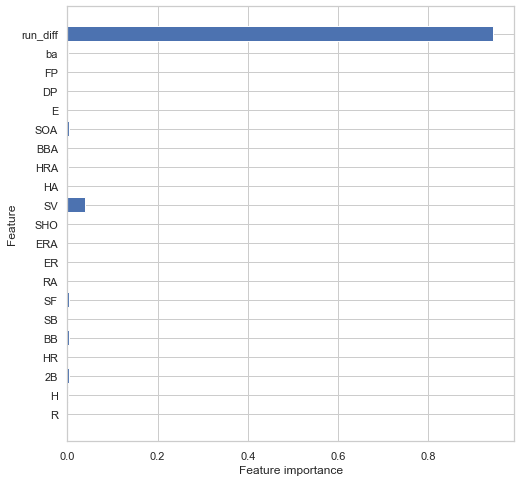

In [56]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

plot_feature_importances(tree_reg)
# plt.savefig('./images/feature_importances_vanilla.png')

In [57]:
# Test set predictions
y_hat_train = tree_reg.predict(X_train)
y_hat_test = tree_reg.predict(X_test)

In [58]:
# Train R2 score
tree_reg.score(X_train, y_train)

0.9312082064003652

In [59]:
# Test R2 score
tree_reg.score(X_test, y_test)

0.8649871772745832

In [60]:
# RMSE
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_hat_train))
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_hat_test))
print('Train Mean Squarred Error:', train_rmse)
print('Test Mean Squarred Error:', test_rmse)

Train Mean Squarred Error: 0.25737514145824625
Test Mean Squarred Error: 0.3904909250956527


In [61]:
# MSE
train_mse2 = mean_squared_error(y_train, y_hat_train)
test_mse2 = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse2)
print('Test Mean Squarred Error:', test_mse2)

Train Mean Squarred Error: 0.06624196344065228
Test Mean Squarred Error: 0.15248316258205863


# Bagging

In [62]:
# Instantiate a BaggingClassifier
bagged_tree =  BaggingRegressor(DecisionTreeRegressor(max_depth=5, random_state=42), 
                                 n_estimators=20)

In [63]:
# Fit to the training data
bagged_tree.fit(X_train, y_train)

BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=5,
                                                      random_state=42),
                 n_estimators=20)

In [64]:
# Training R2 score
bagged_tree.score(X_train, y_train)

0.9445405612306403

In [65]:
# Test R2 score
bagged_tree.score(X_test, y_test)

0.8918117178883384

# Random Forest

In [66]:
# Instantiate and fit a RandomForestRegressor
forest = RandomForestRegressor(n_estimators=100, max_depth= 5)
forest.fit(X_train, y_train)

RandomForestRegressor(max_depth=5)

In [67]:
# Training R2 score
forest.score(X_train, y_train)

0.9465345558650851

In [68]:
# Test R2 score
forest.score(X_test, y_test)

0.8912703715530023

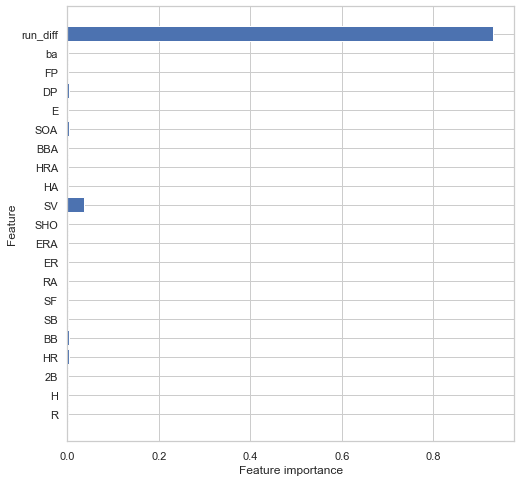

In [69]:
plot_feature_importances(forest)

In [70]:
# Instantiate and fit a RandomForestClassifier
forest2 = RandomForestRegressor(n_estimators=10, max_features=10, max_depth=2)
forest2.fit(X_train, y_train)

RandomForestRegressor(max_depth=2, max_features=10, n_estimators=10)

In [71]:
# First tree from forest_2
rf_tree_1 = forest2.estimators_[0]

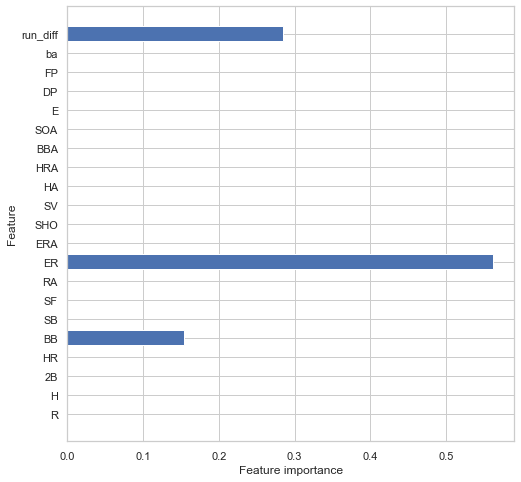

In [72]:
# Feature importance
plot_feature_importances(rf_tree_1)

In [73]:
# second tree from forest_2
rf_tree_2 = forest2.estimators_[1]

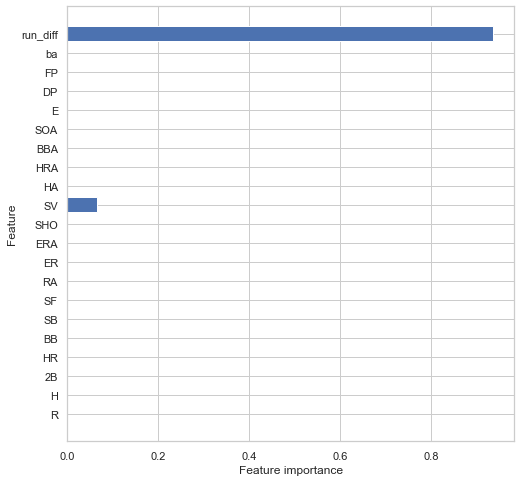

In [74]:
# Feature importance
plot_feature_importances(rf_tree_2)

# Grid Search

In [75]:
dtr = DecisionTreeRegressor()

dtr_cv_score = cross_val_score(dtr, X_train, y_train, cv=3)
mean_dtr_cv_score = np.mean(dtr_cv_score)

print(f"Mean Cross Validation Score: {mean_dtr_cv_score :.2%}")

Mean Cross Validation Score: 79.33%


In [76]:
dtr = DecisionTreeRegressor()

param_grid = {
    'criterion': ['mse'],
    'max_depth': [4, 5, 6],
    'min_samples_split': [6, 7, 8, 9],
    'max_features': [14, 15, 17],
    'random_state': [42]
}

# Instantiate and Fit GridSearchCV
gs_tree = GridSearchCV(dtr, param_grid, cv=3, return_train_score=True)
gs_tree.fit(X_train, y_train)

gs_tree.best_params_

{'criterion': 'mse',
 'max_depth': 4,
 'max_features': 15,
 'min_samples_split': 6,
 'random_state': 42}

In [77]:
# Mean training score
dtr_gs_training_score = np.mean(gs_tree.cv_results_['mean_train_score'])

# Mean test score
dtr_gs_testing_score = gs_tree.score(X_test, y_test)

print(f"Mean Training Score: {dtr_gs_training_score :.2%}")
print(f"Mean Test Score: {dtr_gs_testing_score :.2%}")
print("Best Parameter Combination Found During Grid Search:")
gs_tree.best_params_

Mean Training Score: 93.29%
Mean Test Score: 86.05%
Best Parameter Combination Found During Grid Search:


{'criterion': 'mse',
 'max_depth': 4,
 'max_features': 15,
 'min_samples_split': 6,
 'random_state': 42}

Run model with best params

In [78]:
tree_reg = DecisionTreeRegressor(criterion='mse',
                                 max_depth=4,
                                 max_features=15,
                                 min_samples_split= 6,
                                 random_state= 42) 
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, max_features=15, min_samples_split=6,
                      random_state=42)

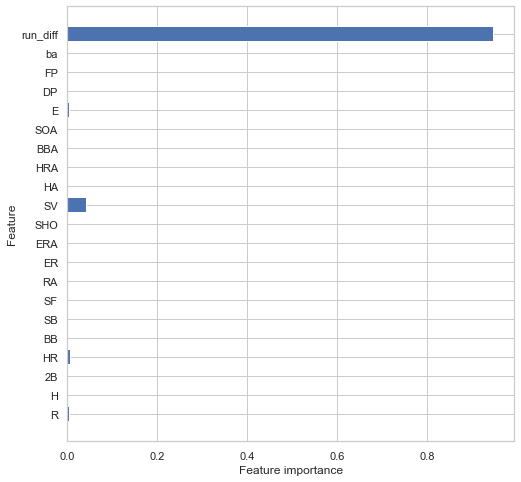

In [79]:
plot_feature_importances(tree_reg)

In [80]:
# Test set predictions
y_hat_train = tree_reg.predict(X_train)
y_hat_test = tree_reg.predict(X_test)

In [81]:
# Train R2 score
tree_reg.score(X_train, y_train)

0.8987525767552778

In [82]:
# Test R2 score
tree_reg.score(X_test, y_test)

0.8604514516677677

In [83]:
rf_reg = RandomForestRegressor()
mean_rf_cv_score = np.mean(cross_val_score(rf_reg, X_train, y_train, cv=3))

print(f"Mean Cross Validation Score for Random Forest Classifier: {mean_rf_cv_score :.2%}")


Mean Cross Validation Score for Random Forest Classifier: 88.77%


In [84]:
rf_param_grid = {
    'n_estimators': [70, 80, 90],
    'criterion': ['mse'],
    'max_depth': [2, 6, 10],
    'min_samples_split': [5, 7, 8],
    'min_samples_leaf': [3, 4, 6]
}

In [85]:
rf_grid_search = GridSearchCV(rf_reg, rf_param_grid, cv=3)
rf_grid_search.fit(X_train, y_train)

print(f"Training Accuracy: {rf_grid_search.best_score_ :.2%}")
print("")
print(f"Optimal Parameters: {rf_grid_search.best_params_}")

Training Accuracy: 88.86%

Optimal Parameters: {'criterion': 'mse', 'max_depth': 6, 'min_samples_leaf': 4, 'min_samples_split': 7, 'n_estimators': 80}


In [86]:
dt_score = gs_tree.score(X_test, y_test)
rf_score = rf_grid_search.score(X_test, y_test)

print('Decision tree grid search: ', dt_score)
print('Random forest grid search: ', rf_score)

Decision tree grid search:  0.8604514516677677
Random forest grid search:  0.8926313734218577


run model with best params

In [88]:
# Instantiate and fit a RandomForestRegressor
forest = RandomForestRegressor(criterion='mse', max_depth=6, min_samples_leaf=4, min_samples_split=7,n_estimators=80)
forest.fit(X_train, y_train)

RandomForestRegressor(max_depth=6, min_samples_leaf=4, min_samples_split=7,
                      n_estimators=80)

In [89]:
# Training R2 score
forest.score(X_train, y_train)

0.9529008981675565

In [90]:
# Test R2 score
forest.score(X_test, y_test)

0.8901589309339751

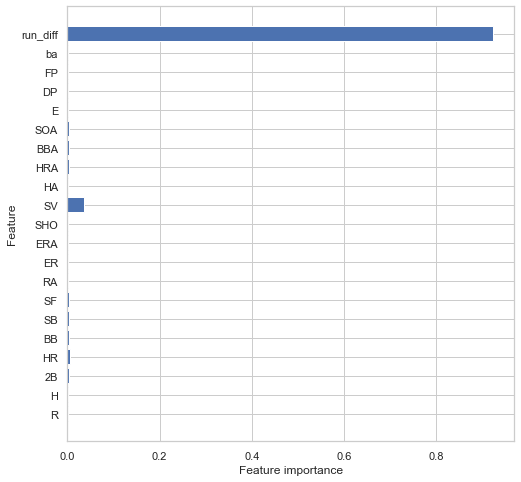

In [91]:
plot_feature_importances(forest)

# Predict and Evaluate on season total wins:

# Model Single Game wins:

In [92]:
df = pd.read_pickle('new_df.pkl')
df.head(10)

,date,team,team_score,opponent_score,Hits,RBI,doubles,strikeouts,def_assists,def_errors,def_doubleplays,pitchers_used,Rolling3_runs_scored,Rolling3_runs_against,Rolling3_run_diff,Rolling3_hits,Rolling3_RBI,Rolling3_doubles,Rolling3_strikeouts,Rolling3_def_assists,Rolling3_def_errors,Rolling3_doubleplays,Rolling3_pitchers_used,game_result
0,2014-03-22,ARI,1,3,5,1,1,10,10,1,0,5,11.000,9.000,2.000,22.000,10.000,5.000,27.000,29.000,4.000,4.000,16.000,0
0,2014-03-22,LAD,3,1,5,3,2,11,13,1,0,4,11.000,9.000,2.000,22.000,10.000,5.000,27.000,29.000,4.000,4.000,16.000,1
1,2014-03-23,LAD,7,5,13,6,3,7,4,1,2,8,11.000,9.000,2.000,22.000,10.000,5.000,27.000,29.000,4.000,4.000,16.000,1
1,2014-03-23,ARI,5,7,8,5,0,8,15,3,1,6,11.000,9.000,2.000,22.000,10.000,5.000,27.000,29.000,4.000,4.000,16.000,0
2,2014-03-30,SDP,3,1,5,3,0,10,10,0,0,5,11.000,9.000,2.000,22.000,10.000,5.000,27.000,29.000,4.000,4.000,16.000,1
2,2014-03-30,LAD,1,3,4,1,0,9,12,2,2,4,11.000,9.000,2.000,22.000,10.000,5.000,27.000,29.000,4.000,4.000,16.000,0
14,2014-03-31,PIT,1,0,6,1,1,6,14,1,1,5,11.000,9.000,2.000,22.000,10.000,5.000,27.000,29.000,4.000,4.000,16.000,1
15,2014-03-31,OAK,0,2,5,0,1,7,8,0,0,5,11.000,9.000,2.000,22.000,10.000,5.000,27.000,29.000,4.000,4.000,16.000,0
12,2014-03-31,BAL,2,1,6,1,0,9,13,0,0,5,11.000,9.000,2.000,22.000,10.000,5.000,27.000,29.000,4.000,4.000,16.000,1
9,2014-03-31,TBD,9,2,11,7,3,6,8,0,1,3,11.000,9.000,2.000,22.000,10.000,5.000,27.000,29.000,4.000,4.000,16.000,1


In [93]:
df.columns

Index(['date', 'team', 'team_score', 'opponent_score', 'Hits', 'RBI',
       'doubles', 'strikeouts', 'def_assists', 'def_errors', 'def_doubleplays',
       'pitchers_used', 'Rolling3_runs_scored', 'Rolling3_runs_against',
       'Rolling3_run_diff', 'Rolling3_hits', 'Rolling3_RBI',
       'Rolling3_doubles', 'Rolling3_strikeouts', 'Rolling3_def_assists',
       'Rolling3_def_errors', 'Rolling3_doubleplays', 'Rolling3_pitchers_used',
       'game_result'],
      dtype='object')

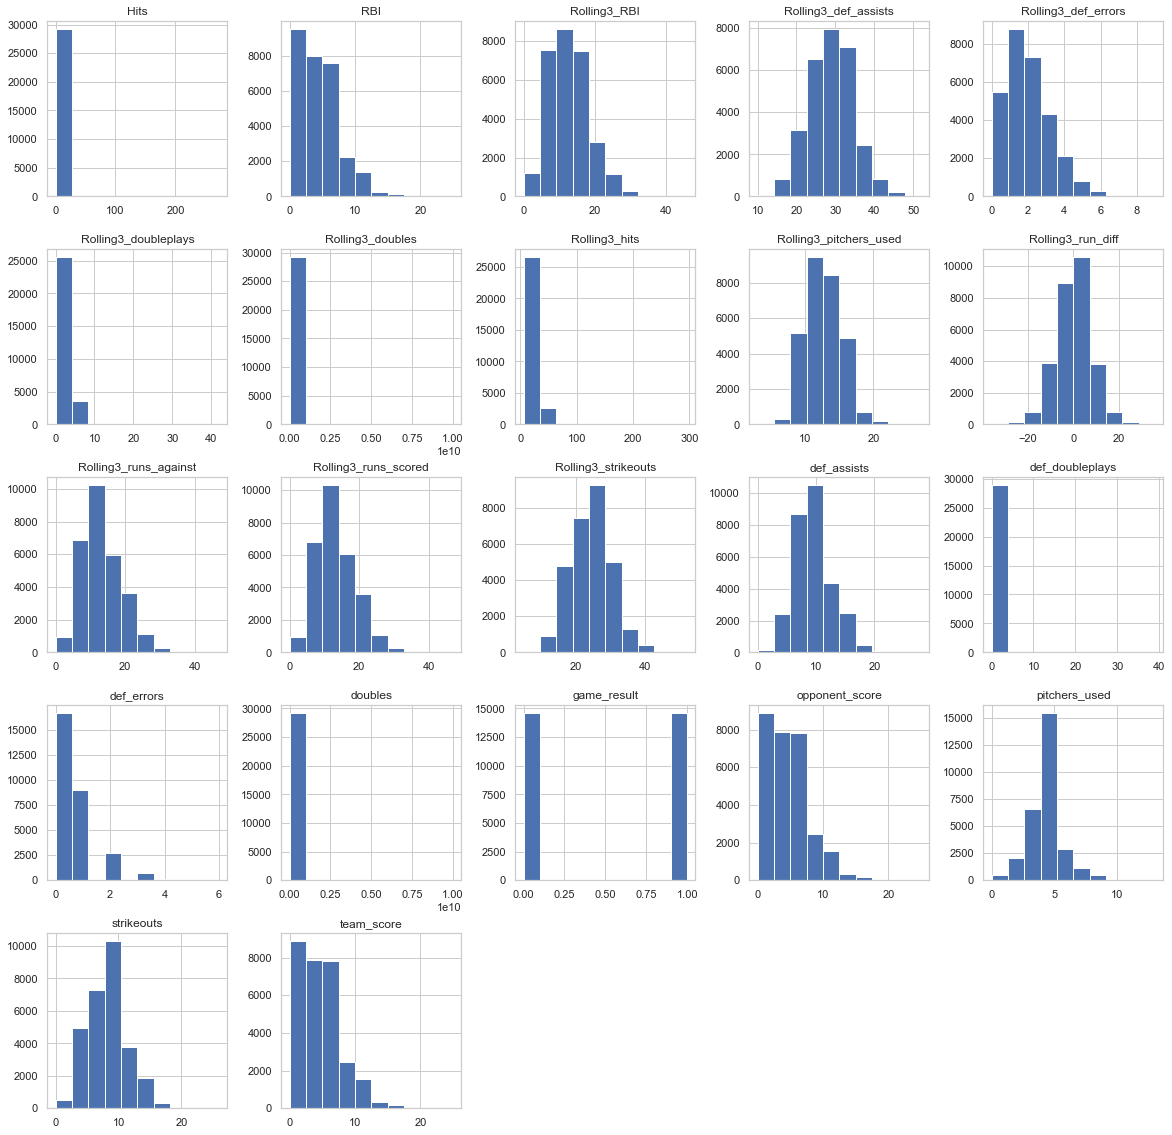

In [94]:
df.hist(figsize=(20,20));

In [95]:
df.columns

Index(['date', 'team', 'team_score', 'opponent_score', 'Hits', 'RBI',
       'doubles', 'strikeouts', 'def_assists', 'def_errors', 'def_doubleplays',
       'pitchers_used', 'Rolling3_runs_scored', 'Rolling3_runs_against',
       'Rolling3_run_diff', 'Rolling3_hits', 'Rolling3_RBI',
       'Rolling3_doubles', 'Rolling3_strikeouts', 'Rolling3_def_assists',
       'Rolling3_def_errors', 'Rolling3_doubleplays', 'Rolling3_pitchers_used',
       'game_result'],
      dtype='object')

In [96]:
target = ['game_result']
features = ['Hits', 'RBI',
       'doubles', 'strikeouts', 'def_assists', 'def_errors', 'def_doubleplays',
       'pitchers_used', 'Rolling3_runs_scored', 'Rolling3_runs_against',
       'Rolling3_run_diff', 'Rolling3_hits',
       'Rolling3_doubles', 'Rolling3_strikeouts', 'Rolling3_def_assists',
       'Rolling3_def_errors', 'Rolling3_doubleplays', 'Rolling3_pitchers_used']
# create your X and y for train/test sets
X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

# scale data using sklearn to normalize all features before running model
ss_scale = preprocessing.StandardScaler().fit(X_train)
X_train_std = ss_scale.transform(X_train)
X_test_std = ss_scale.transform(X_test)

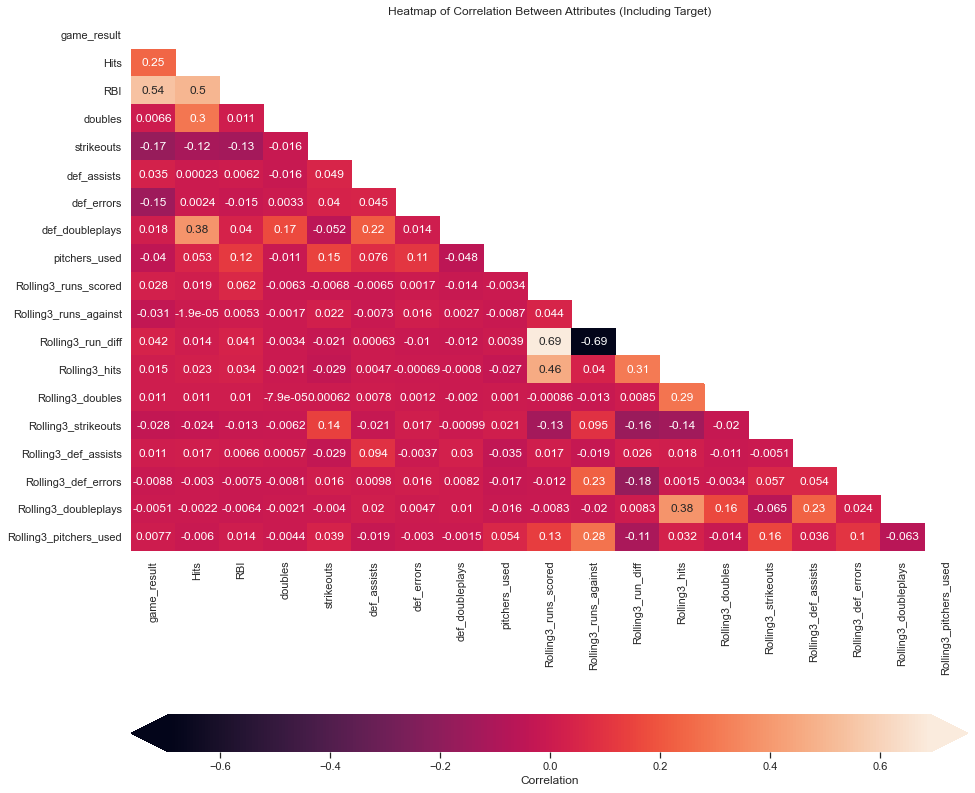

In [97]:
# Create a df with the target as the first column,
# then compute the correlation matrix
heatmap_data = pd.concat([y_train, X_train], axis=1)
corr = heatmap_data.corr()

# Set up figure and axes
fig, ax = plt.subplots(figsize=(15, 15))

# Plot a heatmap of the correlation matrix, with both
# numbers and colors indicating the correlations
sns.heatmap(
    # Specifies the data to be plotted
    data=corr,
    # The mask means we only show half the values,
    # instead of showing duplicates. It's optional.
    mask=np.triu(np.ones_like(corr, dtype=bool)),
    # Specifies that we should use the existing axes
    ax=ax,
    # Specifies that we want labels, not just colors
    annot=True,
    # Customizes colorbar appearance
    cbar_kws={"label": "Correlation", "orientation": "horizontal", "pad": .2, "extend": "both"}
)

# Customize the plot appearance
ax.set_title("Heatmap of Correlation Between Attributes (Including Target)");

Remove 'Rolling3_runs_scored' and 'Rolling3_runs_against' due to multicolinearity

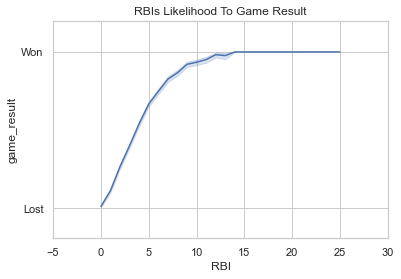

In [98]:
sns.dark_palette("#69d", reverse=True, as_cmap='Blues')
sns.lineplot('RBI','game_result', data=df, alpha=1.0)
y = [0,1]
labels = ['Lost', 'Won']
plt.yticks(y, labels)
plt.margins(0.2)
plt.title('RBIs Likelihood To Game Result')
plt.show()
# plt.savefig('./images/fig1.png');

Run differential is defined as Runs scored - Runs allowed.

I calculated this on a rolling window of 3, 5, and 10 games. 3 being the most highly correlated with winning the next game.

You can clearly see the positive relationship --> The greater the run differential, the greater the probability is to win the game.

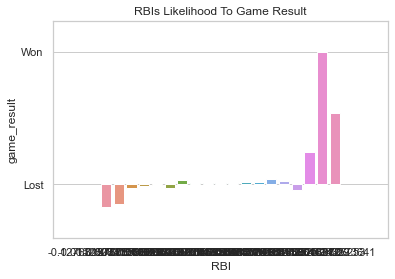

In [99]:
sns.barplot('RBI','game_result', data=corr)
y = [0,1]
labels = ['Lost', 'Won']

# plt.figure(figsize=(12,8))
plt.yticks(y, labels)
plt.margins(0.2)
plt.title('RBIs Likelihood To Game Result')
plt.show()

In [100]:
corr.game_result.value_counts()

0.245     1
0.008     1
0.542     1
0.011     1
0.007     1
0.035     1
0.015     1
-0.147    1
-0.028    1
0.028     1
-0.173    1
-0.040    1
-0.005    1
-0.031    1
0.018     1
0.042     1
-0.009    1
0.011     1
1.000     1
Name: game_result, dtype: int64

In [101]:
df.game_result.value_counts()

0    14578
1    14576
Name: game_result, dtype: int64

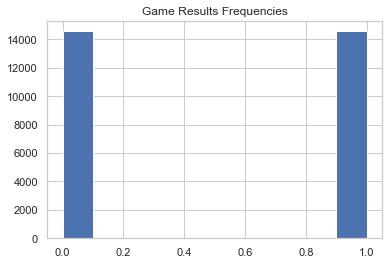

In [102]:
# plotting target variable frequencies
df.game_result.hist()
plt.title('Game Results Frequencies');

# Model 1: Classification on Single Game Data

In [103]:
# instantiating and fitting decision tree model
tree_clf = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42) 
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [104]:
y_pred = tree_clf.predict(X_test)

# confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('Recall score: ',recall_score(y_test, y_pred))

[[2235  633]
 [ 737 2226]]
              precision    recall  f1-score   support

           0       0.75      0.78      0.77      2868
           1       0.78      0.75      0.76      2963

    accuracy                           0.77      5831
   macro avg       0.77      0.77      0.77      5831
weighted avg       0.77      0.77      0.77      5831

Recall score:  0.7512656091798853


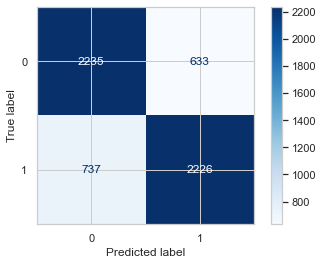

In [105]:
# plotting confusion matrix
plot_confusion_matrix(tree_clf, X_test, y_test,cmap="Blues")
plt.show()

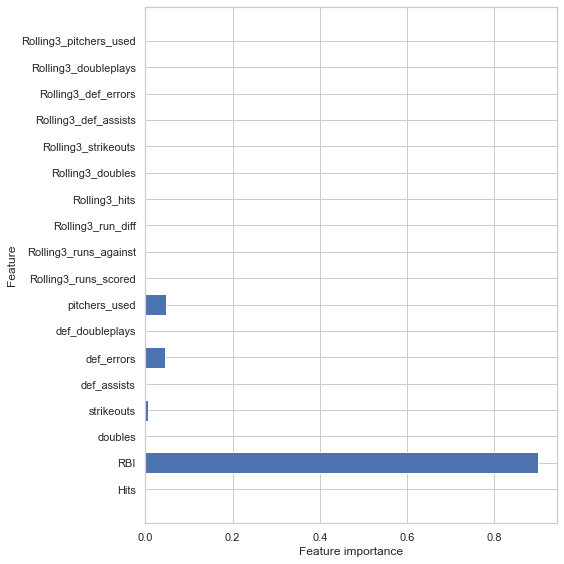

In [116]:
# plotting feature importances
plot_feature_importances(tree_clf)
plt.tight_layout()
plt.savefig('./images/feature_importance_DTC.png')

In [107]:
# function to make a pipeline with classifier
def pipe_maker(classifier):
    '''Takes in a classifier, returns a pipeline'''
    pipe = Pipeline([('scl', StandardScaler()),
                    ('clf', classifier(class_weight= 'balanced', random_state=42))])
    return pipe

In [108]:
# function to create a grid search containing pipeline
def gridsearch_maker(pipeline, params):
    '''Takes in a pipeline and param grid, returns GridSearchCV object'''
    return GridSearchCV(estimator=pipeline,
                        param_grid=params,
                        scoring='recall',
                        cv=10,
                        n_jobs=-1)

In [109]:
# setting grid search parameters
param_range = [1, 2, 3, 4, 5, 6, 7]
param_range_small = [1.0, 0.5, 0.1]

In [110]:
def find_best_recall(gridsearch):
    """ 
    Runs a grid search iterating through predefined grid params and returns best params to optimize recall score. 
  
    Fits classifier to X_train and y_train.
    Determines and prints best params for recall.
    Determines and prints best training set recall.
    Predicts on test data using best params.
    Prints best test set recall.
    Prints classification report for best model.
    Plots confusion matrix for best model.
  
    Parameters: 
    gridsearch: Predefined instance of GridsearchCV with parameters and estimator/pipeline already set.
  
    Returns: 
    Best parameters for particular grid search, based on recall score.
    Best training set recall.
    Best test set recall.
    Classification report for best model.
    Confusion matrix for best model.
  
    """
    # fitting the grid search objects
    best_recall = 0.0
    # fitting grid search
    gridsearch.fit(X_train, y_train)
    # best params
    print('Best params: %s' % gridsearch.best_params_)
    # best training data recall
    print('Best training recall: %.3f' % gridsearch.best_score_)
    # predict on test data with best params
    y_pred = gridsearch.predict(X_test)
    # test data recall with best params
    print('Test set recall score for best params: %.3f ' % recall_score(y_test, y_pred))
    # confusion matrix and classification report
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print('Recall score: ',recall_score(y_test, y_pred))
    # plotting confusion matrix
    plot_confusion_matrix(gridsearch, X_test, y_test,cmap="Blues")
    plt.show()

Best params: {'clf__C': 1.0, 'clf__penalty': 'l2', 'clf__solver': 'liblinear'}
Best training recall: 0.739
Test set recall score for best params: 0.763 
[[2276  592]
 [ 703 2260]]
              precision    recall  f1-score   support

           0       0.76      0.79      0.78      2868
           1       0.79      0.76      0.78      2963

    accuracy                           0.78      5831
   macro avg       0.78      0.78      0.78      5831
weighted avg       0.78      0.78      0.78      5831

Recall score:  0.7627404657441782


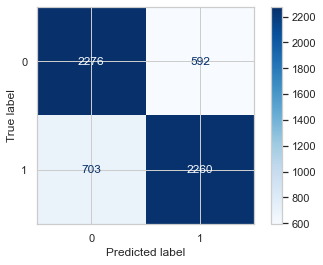

In [111]:
# fitting Logistic Regression pipeline
pipe_lr = pipe_maker(LogisticRegression)

# setting grid search parameters
grid_params_lr = [{'clf__penalty': ['l1', 'l2'],
                   'clf__C': param_range_small,
                   'clf__solver': ['liblinear']}]

# creating grid search object
gs_lr = gridsearch_maker(pipe_lr, grid_params_lr)

# finding best parameters for recall
find_best_recall(gs_lr)

Best params: {'clf__criterion': 'entropy', 'clf__max_depth': 2, 'clf__min_samples_leaf': 5, 'clf__min_samples_split': 2}
Best training recall: 0.777
Test set recall score for best params: 0.801 
[[2052  816]
 [ 590 2373]]
              precision    recall  f1-score   support

           0       0.78      0.72      0.74      2868
           1       0.74      0.80      0.77      2963

    accuracy                           0.76      5831
   macro avg       0.76      0.76      0.76      5831
weighted avg       0.76      0.76      0.76      5831

Recall score:  0.8008774890313871


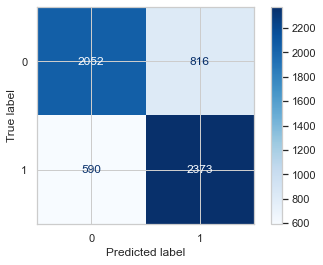

In [112]:
# fitting Random Forest pipeline
pipe_rf = pipe_maker(RandomForestClassifier)

# setting grid search parameters
grid_params_rf = [{'clf__criterion': ['gini', 'entropy'],
                   'clf__min_samples_leaf': param_range,
                   'clf__max_depth': param_range,
                   'clf__min_samples_split': param_range[1:]}]

# creating grid search object
gs_rf = gridsearch_maker(pipe_rf, grid_params_rf)

# finding best parameters for recall
find_best_recall(gs_rf)

# Evaluation:

F1=0.775, AUC=0.865


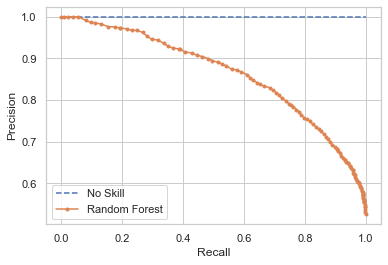

In [115]:
# plotting precision-recall curve
pipe_rf.fit(X_train, y_train)
# predict probabilities
probs = pipe_rf.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# predict class values
y_pred = pipe_rf.predict(X_test)
precision, recall, _ = precision_recall_curve(y_test, probs)
f1, auc = f1_score(y_test, y_pred), auc(recall, precision)
# summarize scores
print('F1=%.3f, AUC=%.3f' % (f1, auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(recall, precision, marker='.', label='Random Forest')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

# Conclusion:

What I found after running my models is that my random forest classifier was the most predictable model when it comes to single-game wins. I ran it in conjunction with a gridsearch, so essentially what this model is doing is going through all permutations of the features, running a prediction on every game, and then taking the average prediction of each permutation to give final results.
This resulted in a 80% recall score , which means that 80% of the single-game wins were correctly predicted. 
The model’s accuracy was 76%, which means that 76% of all predictions were correctly predicted (both wins and losses).
You can see that RBIs were the most important feature in my model’s prediction, along with defensive errors, pitchers used, and strikeouts.
I do want to note that there is a high level of parity in baseball, meaning that the majority of teams are average (81 wins), but also that good teams often lose to bad teams and vice versa. This makes predicting baseball extremely difficult, so while it may seem rudementiary that RBIs is the most important feature, it is understood that these models need to be built from the most micro level (1 pitch, 1 swing), up to the macro level (team stats).

# Recommendations

1) Bet one of the following teams when wagering on a team’s season total wins 	
- Detroit Tigers – 10% - Under
- Houston Astros – 9% - Over
- Cincinnati Reds – 8% - Under
- Milwaukee Brewers – 7% - Over
- San Diego Padres – 6% - Under

2) Bet on teams that have high run differential and produce a lot of RBIs